<div style="text-align: center;font-weight:bold; font-size:300%; LINE-HEIGHT:125%">
    
</div>
<div style="text-align: center;font-weight:bold; font-size:200%; LINE-HEIGHT:125%"> 
        Laboratory #2<br>
        ECE 614 Spring 2020
        
        Classification of MNIST Digits with Multilayer Perceptrons (MLP) and Weight Visualization<br>
</div>
<div style="text-align: center; font-size:100%"> 
        <br><b>Objective:</b> To understand, implement and optimize a classifier of MNIST (planar 2D patterns) with multilayer perceptrons using SoftMax Neurons
</div>

## Tasks
1.Run the code as given for the initial model 784x16x10 (see Fig.1). Do this cell by cell by clicking the Run button. In the visualization code segment, monitor the plot of the validation loss and of the validation accuracy for classification. Note the final value of validation accuracy in the last row.

2.Now insert final value of validation accuracy as the first row in the report table that has 3 rows (one for each activation f-n) and 3 columns (one for each architecture) and the heading row/column. The table should list the best validation accuracy of classification achieved with a tested model. NOTE: "validation" terms refer actually to the "testing" because of how the python compiles the code.

3.Modify the initial architecture as in the original code by changing the sizes and number of the hidden layers 784xH1x(H2-if-needed)x10 (keep the output layer always intact with 10 softmax neurons). As an example, try two hidden layers with 64 neurons per layer: 784x64x64x10. Modify the model again, by picking another architecture (smaller?/larger?). In sum, you need to try 3 architectures.

For each selected architecture, you'll need to adjust the weight visualization part to produce correct figure structures and their sizes.  For each of the three architectures try three arbitrary selected activation functions, giving the total of 9 cases (or 9 final networks). 

4.Insert the final validation accuracies for each network into the report table. Select the best two of 9 cases tested, note the models' details and highlight their best final validation accuracy of classification. Note that Task 7 will require comparison of these two most accurate models of Task 2 with different networks specified in Task 7, so preferably keep the two top models saved.

5.For the very top model provide the full documentation of complete run, including the model loss for training curves and weight visualizations in each layer.

6.By inspecting the report table, comment on any interesting results in the validation loss and accuracy vs. model architectures (layer number and sizes, activation functions, etc).

7.Change the classifier's loss function from categorical cross entropy CE (see Fig.2) to Mean Squared Error (MSE or mse). This will likely require change from softmax output neurons back to the classic tanh or sigmoidal type neurons. Compare your results with cross entropy validation accuracy for the two best models selected out of 9 from Task 2. Choose the better performing models for any future tasks.

8. Try to get experiment outside the box for the best accuracy by tuning your best model through adapting the architecture, choice of activation f-n, the lr and momentum constant. Stay within resasonable reason (say 30 minutes of time) as the number of combinations grows exponentially. Answer by listing the optimum hyperparameters and accuracies.

## Imports
This lab will use the numpy for general and matrix mathematical functions, matplotlib for visualization, and  Keras for AI algorithms.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from keras.datasets import mnist
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Sequential
from keras.utils import to_categorical
from keras import optimizers



Using TensorFlow backend.


## Data Loading and Reshaping
Keras provides the MNIST dataset and other commonly used datasets. More info on these can be found here: https://keras.io/datasets/

MNIST is a dataset of handwritten digits in the form of 28x28 pixel grayscale images. This dataset contains 70,000 sample images. The data is split into 60,000 training and 10,000 testing images. The test images will not be used to adjust weights during the training process. More information on MNIST can be found here: http://yann.lecun.com/exdb/mnist/

Keras models expect inputs to be tensors, represented as multidimensional arrays. The data should be formatted such that each sample is a row (index in the first dimension) of the array. The MNIST dataset is natively in the form of an M x W x H array, where M is the number of samples, W is the width of each image, and H is the height of each image. However, perceptron units do not take input data as 2d planes. Therefore, the W and H dimensions must be reshaped (dimensionality changed) into a vector of length N, where N is equal to 784 (28 x 28).

The final form of the input data is an M x N array, where M is the number of samples, and N is the vector for each sample. Information on the function used to perform this change can be found here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape

The output data must also be vectorized. By default each class label is an integer between 0-9. For training, a target vector of length equal to the number of classes with a 1 in the correct class index is required. Keras has built-in utilities to do this conversion. Observe the output below for the first five samples in the MNIST dataset.
https://keras.io/utils/#to_categorical

11493376/11490434 [==============================] - 1s 0us/step


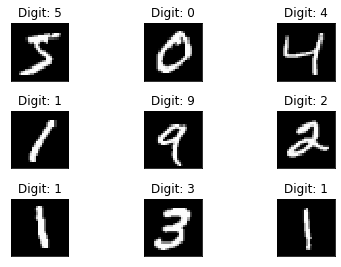

y data before: 
[5 0 4 1 9]

y data after:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()
    
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

num_classes = 10
print('y data before: ')
print(y_train[0:5])

y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)
print('\ny data after:')
print(y_train[0:5])


## Model Setup
![basic_classifier.png](attachment:basic_classifier.png)
<div style="text-align: center;">
            Visualization of Classification Network Architecture
</div>

The general structure of the model setup will be similar to that of Lab #1. However there are a few key differences, mainly due to the type of input and output data.

The input shape to the first layer comes from the dimensionality of the input samples. The final layer of the network has 10 units, one for each of our categories (digits). Unlike in Lab #1, the final layer of this model also has a special activation function. The softmax activation function performs the softmax operation on the 10 neurons of the ouput layer. To simplify, the softmax takes a set of scores at any magnitude, and transforms them to probabilities summing to 1.

![softmax.png](attachment:softmax.png)
<div style="text-align: center;">
            Softmax in Summary
</div>

Another key difference is the loss function, this time defined as categorical cross entropy (CE). The formula can be seen as below, where $t_i$ refers to the $i$-th element of the target vector and $s_i$ refers to the $i$-th element of the models output vector, and C the number of classes. A graph of -ln(x) can be found in Appendix A.
 

$$CE = -\sum_{i}^C t_i\ln{s_i}  $$


If the softmax example shown in Fig.2 had a target vector of [1, 0, 0], then the cross entropy would be calculated as follows:

$$CE = -(1*\ln(0.7)+0*\ln(0.2)+0*\ln(0.1)) \approx 0.357$$

If the target vector was [0, 1, 0]...
$$CE = -(0*\ln(0.7)+1*\ln(0.2)+0*\ln(0.1)) \approx 1.609$$

Which pair would count as correctly classified? How do the magnitudes of the loss compare in these examples?

This model also uses Keras metrics. These are functions for judging the models performance, separate to the loss function. They are not used to make directly update the model. This example uses the 'accuracy' (Acc) metric which calculates the percentage of correct classifications, as in the formula below, where $M$ is the number of samples in the dataset, $t_k$ is the target vector for the $k$-th sample, and $s_k$ is the models output vector for the $k$-th sample. More information on metrics can be found here: https://keras.io/metrics/

$$\DeclareMathOperator*{\argmax}{arg\,max} Acc = \frac{1}{M}\sum_{k}^M\argmax{t_k} == \argmax{s_k} $$

In [0]:
model = Sequential()
model.add(Dense(16, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

sgd = optimizers.SGD(lr=.1, decay=0, momentum=0)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
model.summary()







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


## Model Training
The first two arguments of the fit function are the input and target data, followed by the number of epochs, and the batch size. The optional 'verbose' argument can be used to turn off the output text. Other options are available and will be used in future laboratories. This example also uses validation data from the MNIST test set. 

To start, training will be performed for 10 epochs with a batch size of 128, on 60,000 of the training images. 10,000 test images will be used for testing. 
Options for compiling, fitting, and evaluating the model can be found here.
https://keras.io/models/model/

In [0]:
training_samples = 60000
testing_samples  = 10000

batch_size = 128
epochs     = 10

history = model.fit(x_train[:training_samples],
                    y_train[:training_samples],
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(x_test[:testing_samples],y_test[:testing_samples]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 2s 29us/step - loss: 1.3553 - acc: 0.6981 - val_loss: 0.7814 - val_acc: 0.8467
Epoch 2/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.6269 - acc: 0.8642 - val_loss: 0.5059 - val_acc: 0.8843
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.4668 - acc: 0.8873 - val_loss: 0.4144 - val_acc: 0.8957
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.4008 - acc: 0.8967 - val_loss: 0.3685 - val_acc: 0.9041
Epoch 5/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.3640 - acc: 0.9026 - val_loss: 0.3411 - val_acc: 0.9076
Epoch 6/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.3395 - acc: 0.9078 - val_loss: 0.3216 - val_acc: 0.9108
Epoch 7/10
60000/60000 [==

## Visualization
The %matplotlib qt will make a new, interactive window. Change the qt to inline for figures to appear in this window, but they will not be interactive.

The code below segment outputs two plots from the training performed in the previous code segment. These show the average loss across the training and validation datasets for each epoch. 

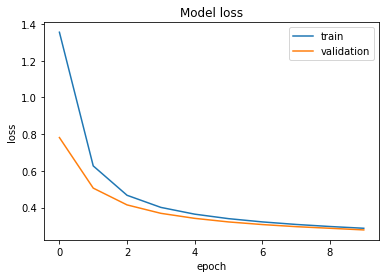

In [0]:
%matplotlib inline

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss'); plt.xlabel('epoch')
plt.legend(('train','validation'))

#### Students to add accuracy plot here ####


plt.show()

## Visualize First Layer Weights

Task left to the student. Convert (reshape) the weight vectors from the first 16 neurons on the first hidden layer into 28x28 pixel images. Display these in a grid.

(784, 16)


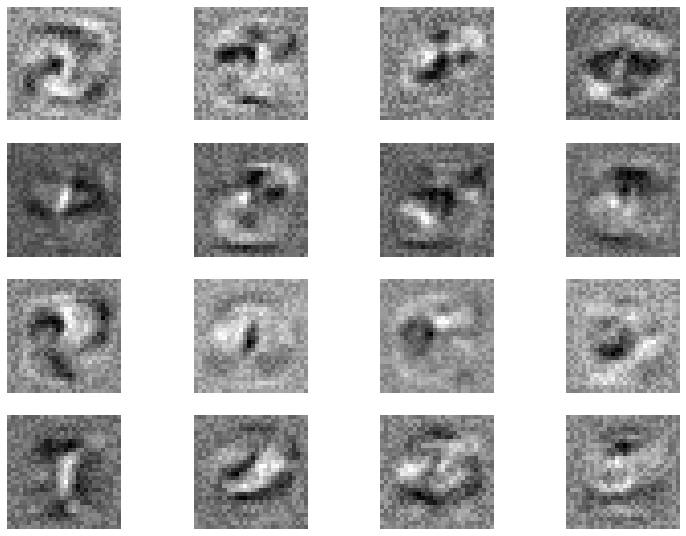

In [0]:
weights = model.get_weights()
#Weights Visualisation of first layer,W1 Matrix 
### hint: This prints the shape of the weight matrix for the first layer ###
print(weights[0].shape)

fig = plt.figure(figsize=[12.8,9.6])
w1=weights[0]
#weight_img = np.zeros((28,28,16))
w2=np.reshape(w1,[28,28,16])
for i in range(16):
    
    ### Students to make visualizations here ###
    #weight_img = np.zeros((28,28))
    weight_img=w2[:,:,i]
    
    plt.subplot(4, 4, i+1)
    plt.imshow(weight_img, cmap='gray', interpolation='none')
    plt.axis('off')

(16, 10)


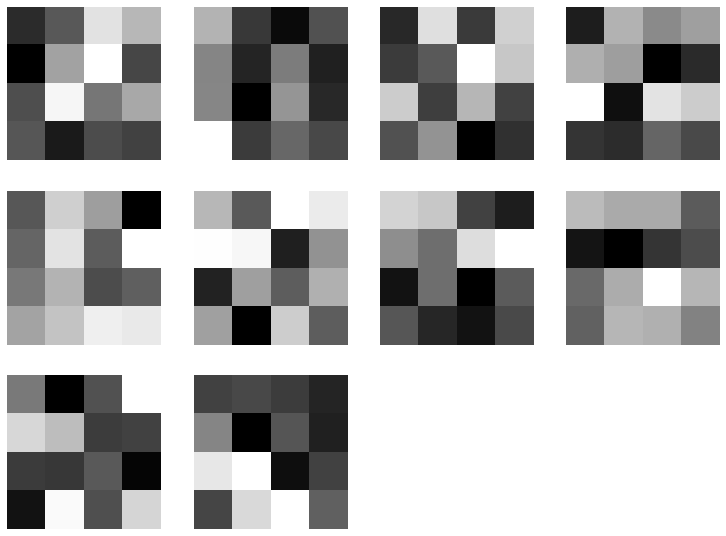

In [0]:
#Weights Visualisation of second layer,W2 Matrix 

### hint: This prints the shape of the weight matrix for the second layer ###
print(weights[2].shape)

fig = plt.figure(figsize=[12.8,9.6])
w3=weights[2]
#weight_img = np.zeros((28,28,16))
w4=np.reshape(w3,[4,4,10])
for i in range(10):
    
    ### Students to make visualizations here ###
    #weight_img = np.zeros((4,4))
    weight_img=w4[:,:,i]
    
    plt.subplot(3, 4, i+1)
    plt.imshow(weight_img, cmap='gray', interpolation='none')
    plt.axis('off')

## Appendix A - Log Loss

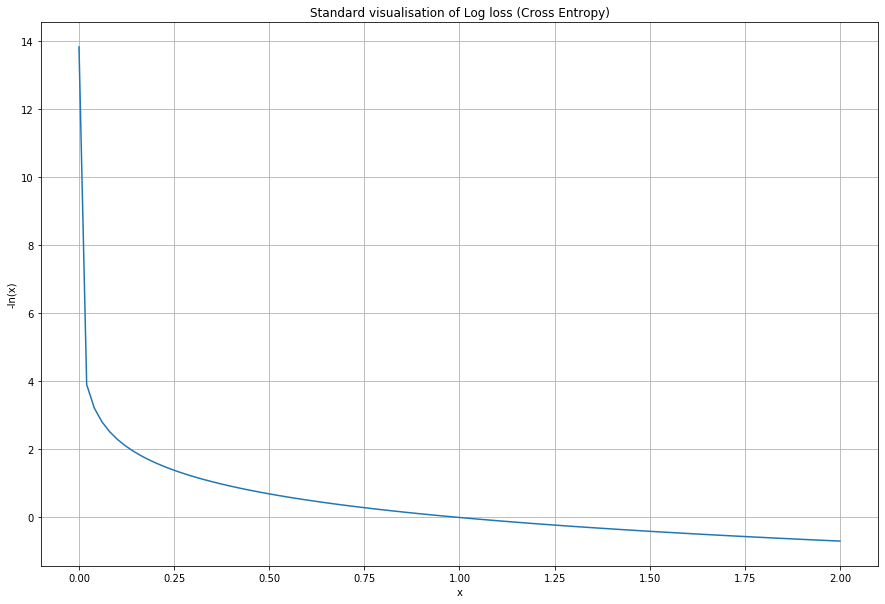

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1e-6,2, 100)

fig = plt.figure(figsize=[15,10])
plt.plot(x,-np.log(x))
plt.grid(True)
plt.title('Standard visualisation of Log loss (Cross Entropy)')
plt.xlabel('x')
plt.ylabel('-ln(x)')
plt.show()